# Employee Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Primary Study of Data

### Reading some rows of the dataset

In [9]:
df_emp= pd.read_csv('C:/Users/STAYLOSO/Downloads/DSE/NPV Mini Project/emp_health.csv')     # argument nrows can also be used
df_emp['expenditure']= df_emp['expenditure']
print("Some rows of the dataset:")
df_emp.head(10)

Some rows of the dataset:


,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
5,i10017,31,female,25.740,0,no,no,south,3756.62160
6,i10018,46,female,33.440,1,daily,no,south,8240.58960
7,i10019,37,female,27.740,3,weekend,no,northwest,7281.50560
8,i10020,37,male,29.830,2,party,no,north,6406.41070
9,i10021,60,female,25.840,0,no,no,northwest,28923.13692


### Data types of all features of the dataset

In [10]:
print("Data types:")
df_emp.dtypes

Data types:


id              object
age              int64
sex             object
bmi            float64
dependent        int64
alcohol         object
smoke           object
zone            object
expenditure    float64
dtype: object

### Statistical Properties of the Data

In [11]:
df_emp.describe(include= 'all')

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
count,1338,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338,1338.000000
unique,1338,NaN,2,NaN,NaN,5,2,8,NaN
top,i10616,NaN,male,NaN,NaN,daily,no,east,NaN
freq,1,NaN,676,NaN,NaN,395,1064,262,NaN
mean,NaN,39.207025,NaN,30.663397,1.094918,NaN,NaN,NaN,13270.422265
std,NaN,14.049960,NaN,6.098187,1.205493,NaN,NaN,NaN,12110.011237
min,NaN,18.000000,NaN,15.960000,0.000000,NaN,NaN,NaN,1121.873900
25%,NaN,27.000000,NaN,26.296250,0.000000,NaN,NaN,NaN,4740.287150
50%,NaN,39.000000,NaN,30.400000,1.000000,NaN,NaN,NaN,9382.033000
75%,NaN,51.000000,NaN,34.693750,2.000000,NaN,NaN,NaN,16639.912515


## Number of Employees above Age 50 who Smoke and their Average Expenditure on Health Management

In [12]:
# 1
print("Number of Employees above Age 50 who Smoke:"
      ,df_emp[(df_emp['age']> 50) & (df_emp['smoke']== 'yes')]['id'].count())

Number of Employees above Age 50 who Smoke: 64


In [13]:
print("Their Average Expenditure on Health Management:"
      ,'Rs.'+str(round(df_emp[(df_emp['age']> 50) & (df_emp['smoke']== 'yes')]['expenditure'].mean(),3)))

Their Average Expenditure on Health Management: Rs.38820.223


## Female Emplyees that do not consume Alcohol daily and their proportion with respect to Total Female Employees 

In [14]:
# 2
print("Number of Female Employees that do not consume Alcohol daily:"
      ,df_emp[(df_emp['sex']=='female') & (df_emp['alcohol']!='daily')]['id'].count())

Number of Female Employees that do not consume Alcohol daily: 453


In [15]:
print("Their proportion with respect to Total Female Employees:"
      ,str(round(((df_emp[(df_emp['sex']== 'female') & (df_emp['alcohol']!= 'daily')]['id'].count())*100)/(df_emp[df_emp['sex']== 'female']['id'].count()),2))+'%')

Their proportion with respect to Total Female Employees: 68.43%


## Zone wise Average Expenditure of Employees on Health

In [20]:
# 3
print("Zone wise average expenditure of Employees on Health:")
df_emp.pivot_table(values='expenditure', columns='zone', aggfunc='mean').round(3)

Zone wise average expenditure of Employees on Health:


zone,east,north,northeast,northwest,south,southeast,southwest,west
expenditure,13774.68,14102.583,13694.722,12151.703,14715.69,14452.95,12717.084,12182.999


## Zone where Employees did the Maximum Expenditure on Health

In [235]:
# 4
print("Zone where the Employees did the Maximum Total Expenditure on Health:"
      ,df_emp.groupby('zone')['expenditure'].sum().reset_index(drop= False).iloc[0,0])

Zone where the Employees did the Maximum Total Expenditure on Health: east


In [39]:
df_emp.pivot_table(values='expenditure', index= 'zone', aggfunc={'expenditure':np.sum}).idxmax()[0]

'east'

## The Minimum Expenditure done by any Employee in the Organization

In [157]:
# 5
print("The Minimum Expenditure done by any employee in the organisation:", df_emp['expenditure'].min())
print()
print("Information of that Employee:")
df_emp[df_emp['expenditure']== df_emp['expenditure'].min()]

The Minimum Expenditure done by any employee in the organisation: 1121.8739

Information of that Employee:


,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
940,i10952,18,male,23.21,0,party,no,southeast,1121.8739


## The Average Expenditure of Employees who have 2 or Lesser Dependents

In [158]:
# 6
print("The Average Expenditure of Employees who have 2 or lesser Dependents:"
      ,round(df_emp[df_emp['dependent']<=2]['expenditure'].mean(),3))

The Average Expenditure of Employees who have 2 or lesser Dependents: 13040.971


## Employees Below the Age of 20 and their Average BMI

In [159]:
# 7
print("Number of Employees below the Age of 20:", df_emp[df_emp['age']<20]['id'].count())

Number of Employees below the Age of 20: 137


In [160]:
print("Average BMI of Employees below the age of 20:",round(df_emp[df_emp['age']<20]['bmi'].mean(),3))

Average BMI of Employees below the age of 20: 29.971


## Data Frame of all Non-Smoker Male Employees

In [91]:
# 8
non_smoker= df_emp[(df_emp['smoke']=='no') & (df_emp['sex']=='male')]

print("Data Frame of all Male Employees who do not Smoke:")
non_smoker

Data Frame of all Male Employees who do not Smoke:


,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55
2,i10014,28,male,33.000,3,rarely,no,south,4449.46
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47
4,i10016,32,male,28.880,0,party,no,northwest,3866.86
8,i10020,37,male,29.830,2,party,no,north,6406.41
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89
1325,i11337,61,male,33.535,0,party,no,east,13143.34
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90
1329,i11341,52,male,38.600,2,party,no,southwest,10325.21


## Data Frame of all Male Employees who do not consume Alcohol

In [92]:
# 9
non_alcoholic= df_emp[(df_emp['sex']=='male') & (df_emp['alcohol']=='no')]

print("Data Frame of all Male Employees who do not consume Alcohol:")
non_alcoholic

Data Frame of all Male Employees who do not consume Alcohol:


,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38
24,i10036,37,male,28.025,2,no,no,northwest,6203.90
28,i10040,23,male,17.385,1,no,no,northwest,2775.19
37,i10049,26,male,20.800,0,no,no,southwest,2302.30
38,i10050,35,male,36.670,1,no,yes,north,39774.28
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65
1301,i11313,62,male,30.875,3,no,yes,west,46718.16
1310,i11322,42,male,26.315,1,no,no,west,6940.91
1320,i11332,31,male,31.065,3,no,no,west,5425.02


## The Men Employees who do not Smoke and consume Alcohol

In [174]:
# 10
# Data Frame of Male Employees who do not smoke but consume Alcohol
non_smoking_alcoholic= df_emp[(df_emp['sex']=='male') & (df_emp['smoke']=='no') & (df_emp['alcohol']!='no')][['id','smoke','alcohol']]
print("Data Frame of Men Employees who do not Smoke and consume Alcohol:")
non_smoking_alcoholic

Data Frame of Men Employees who do not Smoke and consume Alcohol:


,id,smoke,alcohol
1,i10013,no,weekend
2,i10014,no,rarely
3,i10015,no,daily
4,i10016,no,party
8,i10020,no,party
...,...,...,...
1322,i11334,no,weekend
1324,i11336,no,daily
1325,i11337,no,party
1327,i11339,no,daily


In [175]:
# Data Frame of Men Employees who do not Smoke and do not consume Alcohol
non_smoking_alcoholic= pd.merge(non_smoker, non_alcoholic)[['id','smoke','alcohol']]
print("Data Frame of Men Employees who do not Smoke and do not consume Alcohol:")
non_smoking_alcoholic

Data Frame of Men Employees who do not Smoke and do not consume Alcohol:


,id,smoke,alcohol
0,i10030,no,no
1,i10036,no,no
2,i10040,no,no
3,i10049,no,no
4,i10079,no,no
...,...,...,...
104,i11273,no,no
105,i11282,no,no
106,i11322,no,no
107,i11332,no,no


## The Count for Each Zone with respect to Number of Dependent

In [104]:
# 11
print("The count for Each Zone with respect to Number of Dependents:")
pd.crosstab(index= df_emp['zone'], columns=df_emp['dependent'])

The count for Each Zone with respect to Number of Dependents:


dependent,0,1,2,3,4,5
zone,,,,,,
east,124,65,42,22,6,3
north,26,20,10,12,1,1
northeast,35,9,15,13,2,0
northwest,70,28,30,13,4,0
south,38,21,12,12,1,0
southeast,81,57,38,15,2,5
southwest,116,53,44,25,6,7
west,84,71,49,45,3,2


## BMI Categories

In [185]:
# 12
underweight= df_emp[df_emp['bmi']<18.5]     # Category 1

fit= df_emp[(df_emp['bmi']>=18.5) & (df_emp['bmi']<=24.9)]     # Category 2

overweight= df_emp[df_emp['bmi']>24.9]     # Category 3

In [186]:
print("Average Expenditure of Underweight Employees:", round(underweight['expenditure'].mean(),3))

Average Expenditure of Underweight Employees: 8852.201


In [187]:
print("Average Expenditure of Fit Employees:", round(fit['expenditure'].mean(),3))

Average Expenditure of Fit Employees: 10379.5


In [188]:
print("Average Expenditure of Overweight Employees:", round(overweight['expenditure'].mean(),3))

Average Expenditure of Overweight Employees: 13936.617


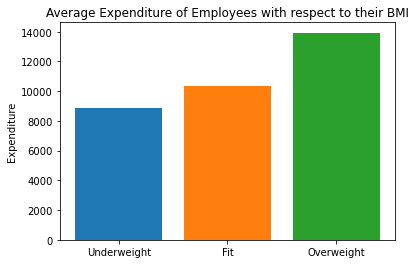

In [215]:
# Bar Chart using Matplotlib
plt.bar(height= underweight['expenditure'].mean(), x= 'Underweight')
plt.bar(height= fit['expenditure'].mean(), x= 'Fit')
plt.bar(height= overweight['expenditure'].mean(), x= 'Overweight')
plt.title("Average Expenditure of Employees with respect to their BMI")
plt.ylabel('Expenditure')
plt.show()

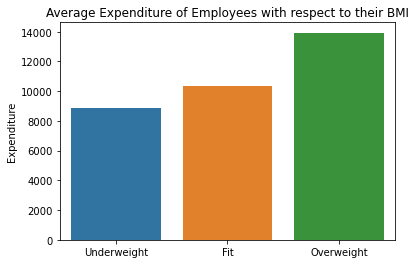

In [192]:
# Bar Chart using Seaborn
sns.barplot(x= ['Underweight','Fit','Overweight']
            ,y= [underweight['expenditure'].mean(),fit['expenditure'].mean(),overweight['expenditure'].mean()])
plt.title("Average Expenditure of Employees with respect to their BMI")
plt.ylabel('Expenditure')
plt.show()

## Line Plot of Expenditure against Age and BMI

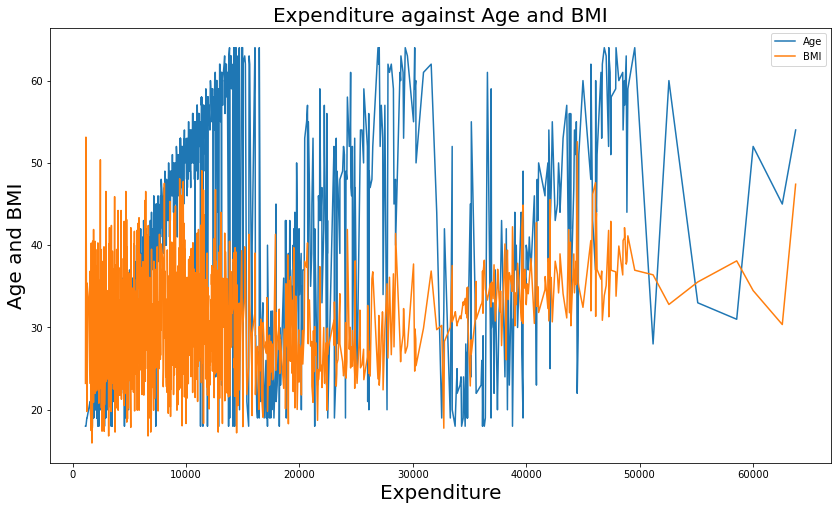

In [207]:
# 13
fig, ax1= plt.subplots(figsize= (14,8))
fig= sns.lineplot(x='expenditure', y='age', data= df_emp)
fig= sns.lineplot(x='expenditure', y='bmi', data= df_emp)
plt.title("Expenditure against Age and BMI", size= 20)
plt.xlabel('Expenditure', size= 20)
plt.ylabel('Age and BMI', size= 20)
plt.legend(['Age','BMI'])
plt.show()

## Bar Chart to show Zone Wise Average Expenditure

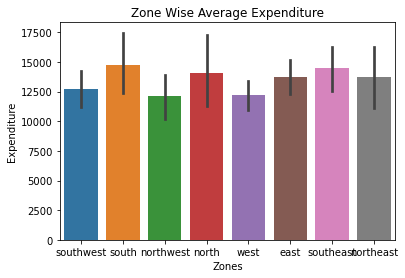

In [228]:
# 14
sns.barplot(x='zone', y='expenditure', data= df_emp)     
plt.title("Zone Wise Average Expenditure")
plt.ylabel('Expenditure')
plt.xlabel('Zones')
plt.show()

In [237]:
df_emp.groupby('zone')['expenditure'].mean()

zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64

## Bar Chart to show Smoking and Alcoholic Habits against Average Expenditure

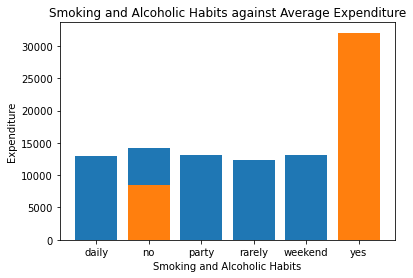

In [227]:
# 15
plt.bar(df_emp.groupby('alcohol')['expenditure'].mean().index, df_emp.groupby('alcohol')['expenditure'].mean())
plt.bar(df_emp.groupby('smoke')['expenditure'].mean().index, df_emp.groupby('smoke')['expenditure'].mean())
plt.title("Smoking and Alcoholic Habits against Average Expenditure")
plt.xlabel("Smoking and Alcoholic Habits")
plt.ylabel('Expenditure')
plt.show()

## Pie Chart for Alcohol Consumption Habits

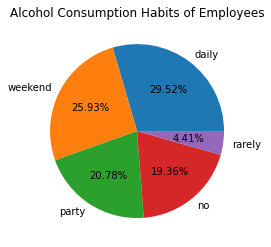

In [118]:
# 16
# Using Matplotlib
plt.pie(x= df_emp['alcohol'].value_counts(), labels= df_emp['alcohol'].value_counts().index, autopct= '%0.2f%%')
plt.title("Alcohol Consumption Habits of Employees")
plt.show()

In [119]:
# Using Plotly
px.pie(values= df_emp['alcohol'].value_counts().values, names= df_emp['alcohol'].value_counts().index, title= "Alcohol Consumption Habits of Employees")

## Scatter Plot to see the relation between Age and Expenditure keeping Smoking Habit as hue

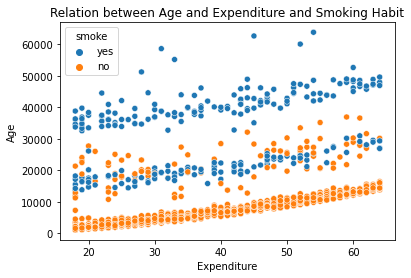

In [122]:
# 17
sns.scatterplot(data= df_emp, x= 'age', y='expenditure', hue= 'smoke')
plt.title("Relation between Age and Expenditure and Smoking Habit")
plt.xlabel('Expenditure')
plt.ylabel('Age')
plt.show()

## Distribution Plot of Expenditure

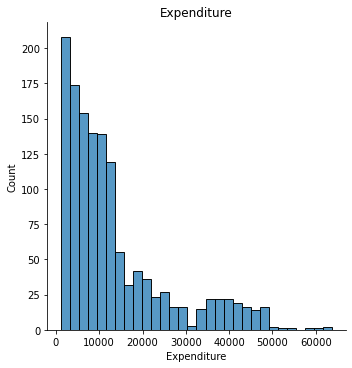

In [123]:
# 18
sns.displot(df_emp['expenditure'])
plt.title("Expenditure")
plt.xlabel('Expenditure')
plt.show()

## Pairplot for the Dataset

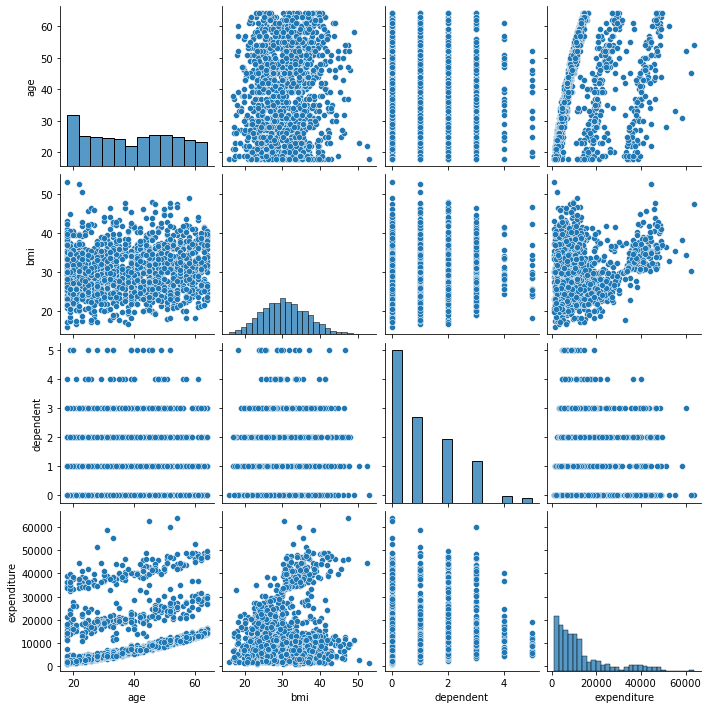

In [236]:
# 19
sns.pairplot(df_emp)
plt.show()

## Heatmap of the Dataset

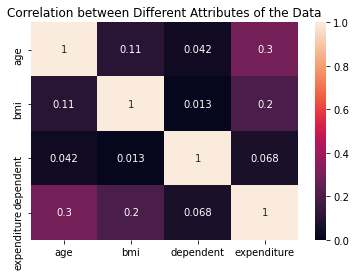

In [131]:
# 20
sns.heatmap(df_emp.corr(), annot= True, vmin=0, vmax=1)
plt.title("Correlation between Different Attributes of the Data")
plt.show()